# The Perceptron

Perceptron learning rule (weight update rule)

$w_{i,j}^{(next step)} = w_{i,j} + \eta (\hat{y_{j}} - y_{j})x_{i})$

- $w_{i,j}$ is the connection weight between the $i^{th}$ input neuron and the $j^{th}$ output neuron.
- $x_{i}$ is the $i^{th}$ input value of the current training instance.
- $\hat{y_{j}}$ is the output of the $j^{th}$ output neuron for the current training instance.
- $y_{j}$ is the target output of the $j^{th}$ output neuron for the current training instance.
- $\eta$ is the learning rate.

The decision boundary of each output nueron is linear, so Perceptrons are incapable of learning complex patterns. However, if the training instances are linearly seperable, Rosenblatt demonstrated that this algorithm would converge to a solution. This is called the __Perceptron convergence theorem__.

In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [2]:
!rmdir /Q /S "logs/Perceptron"
!rmdir /Q /S "models/Perceptron"

In [3]:
# load iris data
iris = load_iris()
X = iris.data[:, (2, 3)] # get petal length, petal width
y = (iris.target == 0).astype(np.int)
# Check depending on the petal length & width if the flower is Iris Setosa

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
X_plot = X.reshape((2, 150))

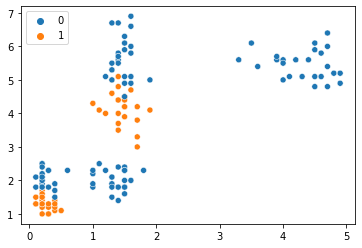

In [6]:
sns.scatterplot(x=X_plot[0], y=X_plot[1], hue=y)

In [7]:
per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

Perceptron(random_state=42)

In [8]:
y_pred = per_clf.predict([[2, 0.5]])

In [9]:
y_pred

array([1])

## Training an MLP with Tensorflow 

In [10]:
import tensorflow as tf

%load_ext tensorboard

In [11]:
mnist_digits = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_digits.load_data()

In [12]:
train_images.shape

(60000, 28, 28)

In [13]:
test_images.shape

(10000, 28, 28)

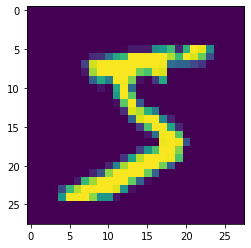

In [14]:
plt.figure()
plt.imshow(train_images[0])
# plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
# Scale the images
train_images = train_images / 255.0

test_images = test_images / 255.0

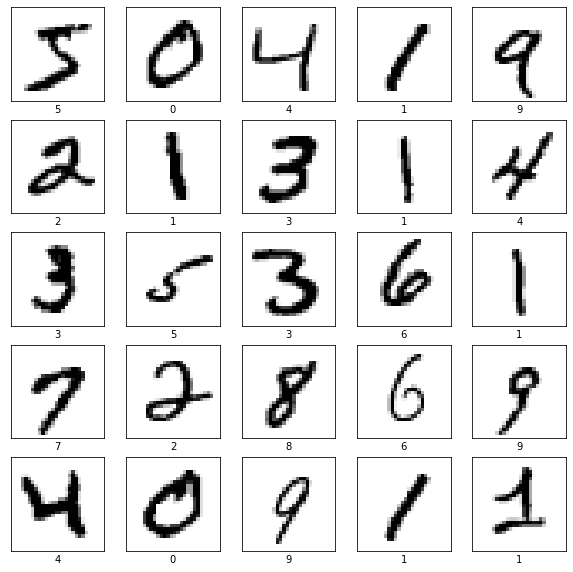

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [17]:
image_shape = train_images[0].shape
output_class_len = 10

In [18]:
image_shape

(28, 28)

In [19]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=image_shape, name='Input_layer'),
    tf.keras.layers.Dense(300, activation='relu', name='Hidden_Layer_1'),
    tf.keras.layers.Dense(100, activation='relu', name='Hidden_Layer_2'),
    tf.keras.layers.Dense(output_class_len, activation='softmax', name='Output_Layer')
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_layer (Flatten)        (None, 784)               0         
_________________________________________________________________
Hidden_Layer_1 (Dense)       (None, 300)               235500    
_________________________________________________________________
Hidden_Layer_2 (Dense)       (None, 100)               30100     
_________________________________________________________________
Output_Layer (Dense)         (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
logdir = "logs/Perceptron"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [23]:
print("Training ... With default parameters")

training_history = model.fit(
                        train_images,
                        train_labels,
                        validation_data=(test_images, test_labels),
                        epochs=10,
                        verbose=0,
                        callbacks=[tensorboard_callback]
                    )

print("Average test loss: ", np.average(training_history.history['loss']))

Training ... With default parameters
Average test loss:  0.05246059354394674


In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.0905 - accuracy: 0.9807

Test accuracy: 0.9807000160217285


In [25]:
%tensorboard --logdir logs/Perceptron

In [26]:
model.save('models/Perceptron')

INFO:tensorflow:Assets written to: models/Perceptron\assets


INFO:tensorflow:Assets written to: models/Perceptron\assets
